<a href="https://colab.research.google.com/github/waigani64/Chemical-Modeling/blob/main/Clay_DLVO_theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
Hamaker_constant = 1.5e-20 # J
surface_potential = -0.1 # V
ionic_strength = 0.01 # M


In [3]:
pH_values = np.arange(2, 12, 0.1)
zeta_potentials = np.zeros_like(pH_values)


In [4]:
for i, pH in enumerate(pH_values):
    # Calculate the surface charge density
    surface_charge_density = 1.8e-4 * (10**(-pH) - 10**(-pH_values[0]))
    
    # Calculate the zeta potential using the DLVO equation
    zeta_potential = (surface_potential * np.exp(-0.25 * surface_charge_density)) / \
                     (1 + (Hamaker_constant * surface_charge_density) / (ionic_strength * 8.854e-12))
    
    zeta_potentials[i] = zeta_potential


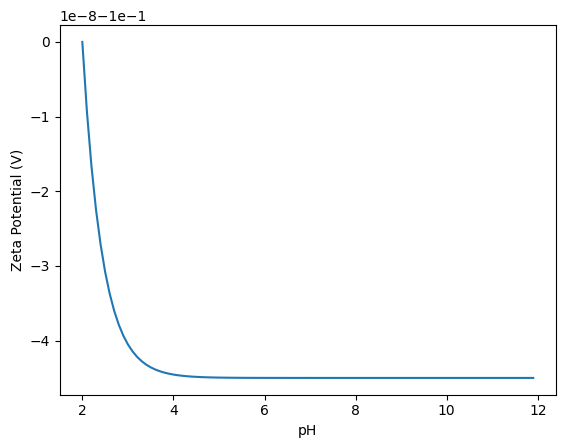

In [5]:
fig, ax = plt.subplots()

ax.plot(pH_values, zeta_potentials)

ax.set_xlabel('pH')
ax.set_ylabel('Zeta Potential (V)')

plt.show()


In [6]:
import numpy as np
import matplotlib.pyplot as plt


In [13]:
num_particles = 1000
box_size = 10 # Angstroms
timestep = 0.03 # picoseconds
total_time = 10 # picoseconds


In [14]:
positions = np.random.rand(num_particles, 3) * box_size
velocities = np.random.rand(num_particles, 3) - 0.5 # Angstroms/picosecond


In [15]:
def lennard_jones_potential(r):
    return 4 * (r**-12 - r**-6)

def lennard_jones_force(r):
    return -24 * (2 * r**-13 - r**-7)


In [16]:
forces = np.zeros((num_particles, 3))

for i in range(num_particles):
    for j in range(i+1, num_particles):
        distance_vector = positions[j] - positions[i]
        distance = np.sqrt(np.sum(distance_vector**2))
        force_magnitude = lennard_jones_force(distance)
        force_vector = force_magnitude * distance_vector / distance
        forces[i] += force_vector
        forces[j] -= force_vector


In [11]:
for i in range(num_particles):
    positions[i] += velocities[i] * timestep + 0.5 * forces[i] * timestep**2
    velocities[i] += 0.5 * forces[i] * timestep
    
    # Apply periodic boundary conditions
    positions[i] %= box_size
    
    forces[i] = np.zeros(3)

    for j in range(i+1, num_particles):
        distance_vector = positions[j] - positions[i]
        distance_vector -= box_size * np.round(distance_vector / box_size)
        distance = np.sqrt(np.sum(distance_vector**2))
        force_magnitude = lennard_jones_force(distance)
        force_vector = force_magnitude * distance_vector / distance
        forces[i] += force_vector
        forces[j] -= force_vector

    velocities[i] += 0.5 * forces[i] * timestep



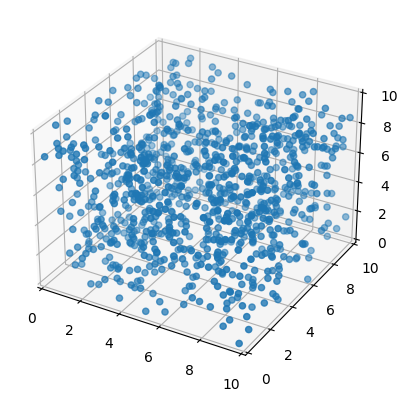

In [17]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2])

ax.set_xlim([0, box_size])
ax.set_ylim([0, box_size])
ax.set_zlim([0, box_size])

plt.show()
